In [1]:
import numpy as np
from scipy import integrate
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Homework1 PETE 4241
The given density Barnett shale and GOM well logs do not start from the surface. For the Barnett shale well, assume a density of 1.9 g/cc for the sediments above the first given data point. For the GOM data, the sea floor is at 1000 ft, and we have sediments with a density of 1.75 g/cc above the first given data point. Assume that the acceleration due to gravity is 9.8 m/s2.  

####   1. Using the given density log data for the Barnett shale well and Gulf of Mexico (GOM) offshore well, compute the following quantities for each given depth.
---

In [2]:
#Unit Converter and basic paramters
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
rho_w=1*g_cm3 #kg/m3

#Load and prepare the data
data1 = np.loadtxt('BarnettShaleData.txt', skiprows=1)
DZ_Barnett,rho_Barnett=data1[:,0]*ft,data1[:,1]*g_cm3
rho_avg=1.9*g_cm3
z0=DZ_Barnett[0]

DZ_Barnett=np.insert(DZ_Barnett,0,[0,z0-1e-6])
rho_Barnett=np.insert(rho_Barnett,0,[rho_avg,rho_avg])

#GOM
data2 = np.loadtxt('GOMData.txt', skiprows=1)
DZ_GOM,rho_GOM=data2[:,0]*ft,data2[:,1]*g_cm3
rho_avg=1.75*g_cm3
zw=1000*ft
z0=DZ_GOM[0]

DZ_GOM=np.insert(DZ_GOM,0,[0,zw-1e-6,zw,z0-1e-6])
rho_GOM=np.insert(rho_GOM,0,[rho_w,rho_w,rho_avg,rho_avg])

> ##### (a) Vertical stress in MPa  
The vertical stress can be calculated in onshore and offshore as follows:  
$${{S}_{v}}={{\bar{\rho }}_{bulk}}g{{z}_{0}}+\int\limits_{{{z}_{0}}}^{z}{{{\rho }_{bulk}}(z)gdz} 
\quad \text{Onshore} $$
$$ {{S}_{v}}={{\rho }_{w}}g{{z}_{w}}+{{\bar{\rho }}_{bulk}}g({{z}_{0}}-{{z}_{w}})+\int\limits_{{{z}_{0}}-{{z}_{w}}}^{z}{{{\rho }_{bulk}}(z)gdz} 
\quad \text{Offshore} $$

In [3]:
#Barnett Shale
Sv_Barnett=integrate.cumtrapz(rho_Barnett*g, DZ_Barnett)

#GOM
Sv_GOM=integrate.cumtrapz(rho_GOM*g, DZ_GOM)


showTables(X=[DZ_Barnett[1:]/1e3,DZ_GOM[1:]/1e3],Y=[Sv_Barnett/1e6,Sv_GOM/1e6],
           XLables=['Depth_Barnett(km)','Depth_GOM(km)'],
           YLabels=['Stress_Barnett(MPa)','Stress_GOM(MPa)'])

,Depth_Barnett(km),Stress_Barnett(MPa)
0,0.028956,0.539161
1,0.214884,3.993620
2,0.400964,8.804230
3,0.587045,13.580829
4,0.773125,18.401076
5,0.959206,23.233326
6,1.145286,28.048931
7,1.331366,32.874588
8,1.517447,37.646433
9,1.703527,42.405327


> ##### (b) Hydrostatic pressure in MPa.  
The pore pressure can be calculated as follows:  
$${{S}_{v}}={{\bar{\rho }}_{w}}g{z} $$

In [4]:
p_pore_Barnett=rho_w*g*DZ_Barnett
p_pore_GOM=rho_w*g*DZ_GOM

showTables(X=[DZ_Barnett/1e3,DZ_GOM/1e3],Y=[p_pore_Barnett/1e6,p_pore_GOM/1e6],
           XLables=['Depth_Barnett(km)','Depth_GOM(km)'],
           YLabels=['PorePressure_Barnett(MPa)','PorePressure_GOM(MPa)'])

,Depth_Barnett(km),PorePressure_Barnett(MPa)
0,0.000000,0.000000
1,0.214884,2.105863
2,0.401117,3.930945
3,0.587350,5.756026
4,0.773582,7.581108
5,0.959815,9.406189
6,1.146048,11.231270
7,1.332281,13.056352
8,1.518514,14.881433
9,1.704746,16.706515


> ##### (c) Gradient of vertical stress in MPa/km.  
The gradient is computed using second order accurate central differences in the interior points and either first or second order accurate one-sides (forward or backwards) differences at the boundaries. Here the `np.gradient` function in `numpy` library is used.
$$ \hat f_{i}^{(1)} = \frac{ \Delta z_{-}^{2}f\left(x_{i} + \Delta z_{+}\right) + \left(\Delta z_{+}^{2} - \Delta z_{-}^{2}\right)f\left(x_{i}\right) - \Delta z_{+}^{2}f\left(x_{i}-\Delta z_{-}\right)} { \Delta z_{-}\Delta z_{+}\left(\Delta z_{+} + \Delta z_{-}\right)} + \mathcal{O}\left(\frac{\Delta z_{+}\Delta z_{-}^{2} + \Delta z_{-}\Delta z_{+}^{2}}{\Delta z_{+} + \Delta z_{-}}\right)$$

In [5]:
Sv_grad_Barnett=np.gradient(Sv_Barnett,DZ_Barnett[1:])
Sv_grad_GOM=np.gradient(Sv_GOM,DZ_GOM[1:])

showTables(X=[DZ_Barnett[1:]/1e3,DZ_GOM[1:]/1e3],Y=[Sv_grad_Barnett/1e3,Sv_grad_GOM/1e3],
           XLables=['Depth_Barnett(km)','Depth_GOM(km)'],
           YLabels=['Sv_Barnett_grad(MPa/km)','Sv_GOM_grad(MPa/km)'])

,Depth_Barnett(km),Sv_Barnett_grad(MPa/km)
0,0.028956,18.511220
1,0.214884,24.530625
2,0.400964,25.662525
3,0.587045,25.964120
4,0.773125,25.974410
5,0.959206,26.202260
6,1.145286,26.010670
7,1.331366,26.098135
8,1.517447,25.805850
9,1.703527,24.947125


> ##### (d) Porosity.  
The porosity can be easily calculated from the bulk density as follows:
$$\phi =\frac{{\rho }_{m}-{\rho }_{b}}{{\rho }_{m}-{\rho }_{f}}$$

In [6]:
rho_w=1*g_cm3
rho_m=2.7*g_cm3

phi_Barnett=(rho_m-rho_Barnett)/(rho_m-rho_w)
phi_GOM=(rho_m-rho_GOM)/(rho_m-rho_w)
showTables(X=[DZ_Barnett/1e3,DZ_GOM/1e3],Y=[phi_Barnett,phi_GOM],
           XLables=['Depth_Barnett(km)','Depth_GOM(km)'],
           YLabels=['Porosity_Barnett(-)','Porosity_GOM(-)'])

,Depth_Barnett(km),Porosity_Barnett(-)
0,0.000000,0.470588
1,0.214884,0.115647
2,0.401117,0.039176
3,0.587350,0.019412
4,0.773582,0.028706
5,0.959815,0.012294
6,1.146048,0.019176
7,1.332281,0.009824
8,1.518514,0.118471
9,1.704746,0.049412


#### 2.Create the following plots for the Barnett and GOM wells (with the x-axis above and have depth increase downwards on the y-axis)
---

> ##### (a) Depth vs density

<Figure size 320x400 with 0 Axes>

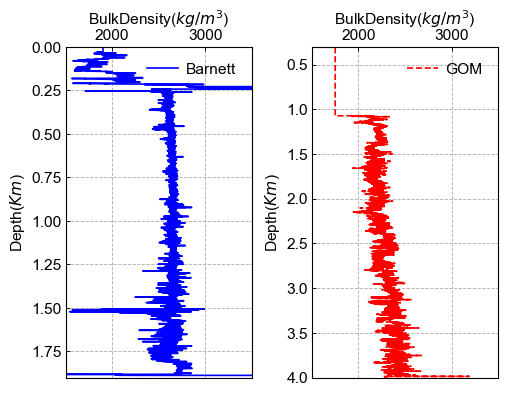

In [7]:
plotTables(X=[rho_Barnett,rho_GOM],Y=[DZ_Barnett/1e3,DZ_GOM/1e3],
           XLable='BulkDensity($kg/m^3$)',YLabel='Depth($Km$)',DataNames=['Barnett','GOM'],
           Xlim=[1500,3500],Ylim=[[0,1.9],[0.3,4.0]],subplots=[121,122],
           InvertY=True,img_fname='img.png')

>  ##### (b) depth versus `vertical stress` and `hydrostatic pressure`

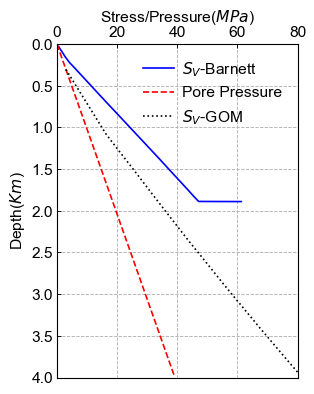

In [8]:
plotTables(Y=[DZ_Barnett[1:]/1e3,DZ_GOM/1e3,DZ_GOM[1:]/1e3,],X=[Sv_Barnett/1e6,p_pore_GOM/1e6,Sv_GOM/1e6],
           XLable='Stress/Pressure($MPa$)',YLabel='Depth($Km$)',
           DataNames=['$S_V$-Barnett','Pore Pressure','$S_V$-GOM'],
           Ylim=[0,4],Xlim=[0,80],
           InvertY=True,img_fname='img.png')

>  ##### (c) depth versus gradient of verticl stress in MPa/km

<Figure size 320x400 with 0 Axes>

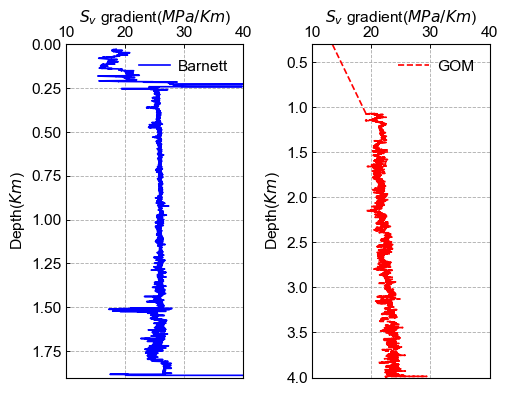

In [9]:
plotTables(Y=[DZ_Barnett[1:]/1e3,DZ_GOM[1:]/1e3],X=[Sv_grad_Barnett/1e3,Sv_grad_GOM/1e3],
           XLable='$S_v$ gradient($MPa/Km$)',YLabel='Depth($Km$)',DataNames=['Barnett','GOM'],
           Ylim=[[0,1.9],[0.3,4.0]],Xlim=[10,40],subplots=[121,122],
           InvertY=True,img_fname='img.png')

>  ##### (d) depth versus porosity

<Figure size 320x400 with 0 Axes>

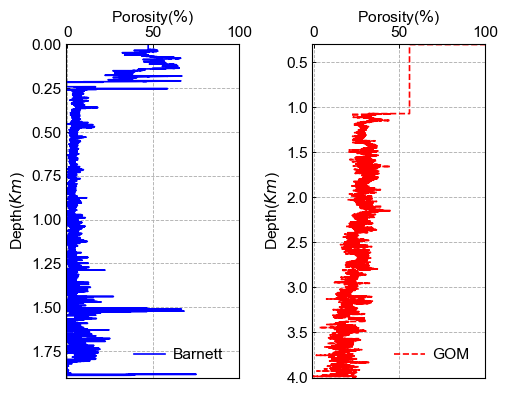

In [10]:
plotTables(Y=[DZ_Barnett/1e3,DZ_GOM/1e3],X=[phi_Barnett*100,phi_GOM*100],
           XLable='Porosity($\%$)',YLabel='Depth($Km$)',DataNames=['Barnett','GOM'],
           Ylim=[[0,1.9],[0.3,4.0]],Xlim=[-1,100],subplots=[121,122],
           InvertY=True,img_fname='img.png')

> #### 3 (i). Divide the density profile in 2(a) into 5 blocks using the variations in the bulk density values
---
> Based on the smoothed density log by moving average, the block can be expressed as follows:  

,Block_Barnett(km),Block_GOM(km)
0,"(0.041, 0.15)","(1.07, 1.35)"
1,"(0.15, 0.25)","(1.35, 1.45)"
2,"(0.25, 1.5)","(1.45, 2.0)"
3,"(1.5, 1.8)","(2.0, 3.0)"
4,"(1.8, 1.88)","(3.0, 4.0)"


<Figure size 320x400 with 0 Axes>

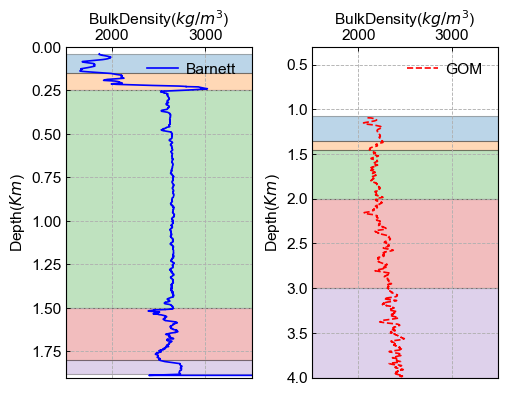

In [11]:
Block_Barnett=[(0.041,0.15),(0.15,0.25),(0.25,1.5),(1.5,1.8),(1.8,1.88)]
Block_GOM=[(1.07,1.35),(1.35,1.45),(1.45,2.0),(2.0,3.0),(3.0,4.0)]

rho_Barnett_c,DZ_Barnett_c=smooth(rho_Barnett,DZ_Barnett,windows=80)
rho_GOM_c,DZ_GOM_c=smooth(rho_GOM,DZ_GOM,windows=80)


showTables([Block_Barnett,Block_GOM],XLables=['Block_Barnett(km)','Block_GOM(km)'])

plotTables(X=[rho_Barnett_c,rho_GOM_c],Y=[DZ_Barnett_c/1e3,DZ_GOM_c/1e3],
           XLable='BulkDensity($kg/m^3$)',YLabel='Depth($Km$)',DataNames=['Barnett','GOM'],
           Xlim=[1500,3500],Ylim=[[0,1.9],[0.3,4.0]],subplots=[121,122],
           RegionShade=[Block_Barnett,Block_GOM],
           InvertY=True,img_fname='img.png')

> ##### 3 (ii). Within each of these blocks, compute the average density and plot depth versus the blocked density for both the Barnett and GOM wells.
The average density for each block can be calculated as follows:  

In [12]:
#Average density for these blocks
rho_avg_Barnett=rangeMean(rho_Barnett,DZ_Barnett/1e3,Block_Barnett)
rho_avg_GOM=rangeMean(rho_GOM,DZ_GOM/1e3,Block_GOM)

showTables(X=[Block_Barnett,Block_GOM],Y=[rho_avg_Barnett,rho_avg_GOM],
           XLables=['Block_Barnett(km)','Block_GOM(km)'],
           YLabels=['Average Density($kg/m^3$)','Average Density($kg/m^3$)'])

,Block_Barnett(km),Average Density($kg/m^3$)
0,"(0.041, 0.15)",1809.017063
1,"(0.15, 0.25)",2325.148933
2,"(0.25, 1.5)",2633.100719
3,"(1.5, 1.8)",2573.398680
4,"(1.8, 1.88)",2714.509542
,Block_GOM(km),Average Density($kg/m^3$)
0,"(1.07, 1.35)",2194.688865
1,"(1.35, 1.45)",2175.615854
2,"(1.45, 2.0)",2181.517184
3,"(2.0, 3.0)",2256.200549


> ##### 3 (iii). Is there any value in blocking the continuous density profile this way? What could we possibly achieve in a MEM by using the blocked density profile instead of the continuous density profile?
As shown in 3(i), I used `moving average algorithm` in `Pandas` library to find the 'True' trend line for density log which allows us to easily interoperate and analyze the log by removing the spikes and noise in the data

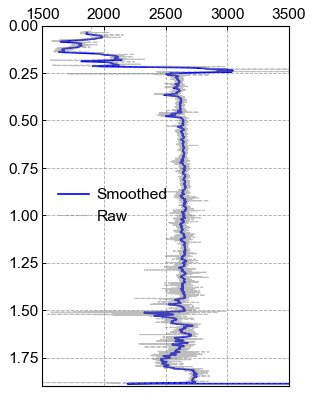

In [13]:
xx=smooth(rho_Barnett,DZ_Barnett/1e3,windows=50,plot=True,xlim=[1500,3500],ylim=[0,1.9])

> #### 4 Estimate the following parameters  
i. What is the overburden stress (in MPa) in the Barnett shale well at 5,000 ft? (1%)  
ii. What is the pore pressure (in MPa) in the Barnett shale well at 5,000 ft? (1%)   
iii. What is the overburden stress (in MPa) in the GOM well at 5,000 ft? (1%)  
iv. What is the pore pressure(in MPa) in the GOM well at 5,000 ft? (1%)  
v. What is the overburden stress gradient (in MPa/km) in the Barnett shale well at 5,000 ft? (1%)  
vi. What is the overburden stress gradient (in MPa/km) in the GOM well at 5,000 ft? (1%)  
vii. What is the porosity in the Barnett shale well at 2,500 ft? (1%)  
viii. What is the porosity in the GOM well at 10,000 ft? (1%)  
ix. What is the bulk density (in g/cc) in the Barnett shale well at 5,000 ft? (1%)  
x. What is the bulk density (in g/cc) in the GOM well at 5,000 ft? (1%)

These paramters can be estimated by using linear interpolation between two neighboring datas. All paramters are shown as follows:

In [14]:
Answer={'$S_v$ (MPa) @ 5000ft Barnett':np.interp(5000*ft,DZ_Barnett[1:],Sv_Barnett/1e6),
        '$p_p$ (MPa) @ 5000ft Barnett':np.interp(5000*ft,DZ_Barnett,p_pore_Barnett/1e6),
        '$S_v$ (MPa) @ 5000ft GOM':np.interp(5000*ft,DZ_GOM[1:],Sv_GOM/1e6),
        '$p_p$ (MPa) @ 5000ft GOM':np.interp(5000*ft,DZ_GOM,p_pore_GOM/1e6),
        '$grad(S_v)$ (MPa/km) @ 5000ft Barnett':np.interp(5000*ft,DZ_Barnett[1:],Sv_grad_Barnett/1e3),
        '$grad(S_v)$ (MPa/km) @ 5000ft GOM':np.interp(5000*ft,DZ_GOM[1:],Sv_grad_GOM/1e3),
        '$Porosity$ @ 2500ft Barnett':np.interp(2500*ft,DZ_Barnett,phi_Barnett),
        '$Porosity$ @ 10000ft GOM':np.interp(10000*ft,DZ_GOM,phi_GOM),
        '$\rho_{b}$ $(g/cc)$ @ 5000ft Barnett':np.interp(5000*ft,DZ_Barnett,rho_Barnett/g_cm3),
        '$\rho_{b}$ $(g/cc)$ @ 5000ft GOM':np.interp(5000*ft,DZ_GOM,rho_GOM/g_cm3),
       }
#Show Table
pd.DataFrame.from_dict(Answer,orient='index',columns=['Value'])

,Value
$S_v$ (MPa) @ 5000ft Barnett,37.807537
$p_p$ (MPa) @ 5000ft Barnett,14.935200
$S_v$ (MPa) @ 5000ft GOM,25.839252
$p_p$ (MPa) @ 5000ft GOM,14.935200
$grad(S_v)$ (MPa/km) @ 5000ft Barnett,22.852620
$grad(S_v)$ (MPa/km) @ 5000ft GOM,21.285600
$Porosity$ @ 2500ft Barnett,0.029235
$Porosity$ @ 10000ft GOM,0.197647
$\rho_{b}$ $(g/cc)$ @ 5000ft Barnett,2.406100
$\rho_{b}$ $(g/cc)$ @ 5000ft GOM,2.164000
